# British Airways Reviews Analysis To Gain Company Insights

# Task 1

**Web scraping and analysis**

This Jupyter notebook includes some code to get started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once we've collected data and saved it into a local .csv file we'll start with analysis.

**Scraping data from Skytrax**

Visit [https://www.airlinequality.com] we can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

Navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] to see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.
    
Scrape and collect customer feedback by analysing third-party data

In [47]:
# importing the required library

import requests
from bs4 import BeautifulSoup

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Web scraping data from Skytrax

In [2]:
# Collecting the data from skytrax webpage with the help of BeautifulSoup (WEB-SCRAPING)
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 35
page_size = 100 

# Creating empty list to append the values in it 
reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
rating = []
category = []
df = pd.DataFrame()

# for loop to get the data from the pages through iteration 
for i in range(1, pages + 1):
  
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [48]:
df.head()

,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Route,Wifi & Connectivity,Aircraft,Food & Beverages,Inflight Entertainment,reviews
0,Family Leisure,Economy Class,July 2024,1.0,1.0,1.0,1,no,NaN,NaN,NaN,NaN,NaN,Not Verified | The customer service is one of...
1,Solo Leisure,Economy Class,June 2024,1.0,1.0,1.0,1,no,London to Basel,1.0,NaN,NaN,NaN,"Not Verified | Before my flight, I was forced ..."
2,Solo Leisure,Business Class,July 2024,5.0,5.0,4.0,4,yes,Vancouver to London,NaN,A350,5.0,5.0,✅ Trip Verified | British Airways at its bes...
3,Solo Leisure,Economy Class,August 2024,3.0,5.0,4.0,4,yes,London to Amman,NaN,A320,4.0,NaN,✅ Trip Verified | An excellent flight! Despite...
4,Family Leisure,Economy Class,August 2024,3.0,4.0,2.0,3,no,Barcelona to Dallas via Heathrow,NaN,A380,4.0,4.0,✅ Trip Verified | I recently traveled with Bri...


In [49]:
# Saving the data into csv file 
df.to_csv("BA_reviews_shanila.csv")

In [50]:
# Loading the dataset
data = pd.read_csv('BA_reviews_shanila.csv')
data 

,Unnamed: 0,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Route,Wifi & Connectivity,Aircraft,Food & Beverages,Inflight Entertainment,reviews
0,0,Family Leisure,Economy Class,July 2024,1.0,1.0,1.0,1,no,NaN,NaN,NaN,NaN,NaN,Not Verified | The customer service is one of...
1,1,Solo Leisure,Economy Class,June 2024,1.0,1.0,1.0,1,no,London to Basel,1.0,NaN,NaN,NaN,"Not Verified | Before my flight, I was forced ..."
2,2,Solo Leisure,Business Class,July 2024,5.0,5.0,4.0,4,yes,Vancouver to London,NaN,A350,5.0,5.0,✅ Trip Verified | British Airways at its bes...
3,3,Solo Leisure,Economy Class,August 2024,3.0,5.0,4.0,4,yes,London to Amman,NaN,A320,4.0,NaN,✅ Trip Verified | An excellent flight! Despite...
4,4,Family Leisure,Economy Class,August 2024,3.0,4.0,2.0,3,no,Barcelona to Dallas via Heathrow,NaN,A380,4.0,4.0,✅ Trip Verified | I recently traveled with Bri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,NaN,Business Class,NaN,3.0,2.0,NaN,1,no,NaN,NaN,NaN,4.0,1.0,Heathrow to Bergen Business no priority boardi...
3496,3496,NaN,Business Class,NaN,1.0,1.0,NaN,1,no,NaN,NaN,NaN,1.0,1.0,BA176 JFK to Heathrow 13 October 2014. The out...
3497,3497,NaN,Premium Economy,NaN,5.0,5.0,NaN,5,yes,NaN,NaN,NaN,5.0,5.0,Very impressed with Premium Economy on BA Sydn...
3498,3498,NaN,Premium Economy,NaN,2.0,5.0,NaN,2,yes,NaN,NaN,NaN,5.0,3.0,Aberdeen-Heathrow-Miami and return World Trave...


# Data Cleaning

In [51]:
# will create the new column "Verified" 
data['Trip Verified']= data['reviews'].str.contains('Trip Verified')
data['Trip Verified'].head(10)

0    False
1    False
2     True
3     True
4     True
5     True
6    False
7     True
8     True
9     True
Name: Trip Verified, dtype: bool

In [52]:
data.tail(2)

,Unnamed: 0,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Route,Wifi & Connectivity,Aircraft,Food & Beverages,Inflight Entertainment,reviews,Trip Verified
3498,3498,NaN,Premium Economy,NaN,2.0,5.0,NaN,2,yes,NaN,NaN,NaN,5.0,3.0,Aberdeen-Heathrow-Miami and return World Trave...,False
3499,3499,NaN,Business Class,NaN,3.0,2.0,NaN,3,no,NaN,NaN,NaN,3.0,3.0,LHR-DEN DEN-LHR - always use upper class in VA...,False


In [53]:
# clean review column to remove "Trip verified","Not Verified"
data["reviews"] = data["reviews"].apply(lambda x: x.replace("✅ Trip Verified | ", ""))

# clean review column to remove "not verified"
data["reviews"] = data["reviews"].apply(lambda x: x.replace("Not Verified | ", ""))

# clean reviews
data["reviews"] = data["reviews"].apply(lambda x: x.replace(")(,.`| ", ""))

In [183]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
data['reviews'] = data['reviews'].apply(clean)

data

,Unnamed: 0,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Route,Aircraft,Food & Beverages,Inflight Entertainment,reviews,Trip Verified
2,2,Solo Leisure,Business Class,2024-07,5.0,5.0,4.000000,4,yes,Vancouver to London,A350,5.0,5.000000,Trip Verified British Airways at its best Out...,True
3,3,Solo Leisure,Economy Class,2024-08,3.0,5.0,4.000000,4,yes,London to Amman,A320,4.0,2.763815,An excellent flight Despite this being a hour ...,True
4,4,Family Leisure,Economy Class,2024-08,3.0,4.0,2.000000,3,no,Barcelona to Dallas via Heathrow,A380,4.0,4.000000,I recently traveled with British Airways and h...,True
7,7,Family Leisure,Economy Class,2024-08,1.0,1.0,3.000000,1,no,London to Tampa,Boeing 777,1.0,4.000000,After paying for tickets for my family includi...,True
8,8,Couple Leisure,Economy Class,2024-07,4.0,4.0,4.000000,4,yes,Dublin to London City,Embraer 190,3.0,2.763815,An excellent flight on BA CityFlyer The plane ...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,3060,Business,Business Class,2015-05,1.0,3.0,3.000000,1,no,LHR to SOF,A321,2.0,1.000000,Terrible Flight time is well over hours Seatin...,False
3061,3061,Solo Leisure,Economy Class,2015-05,3.0,5.0,3.100604,4,yes,LHR-DEN,B747,4.0,2.000000,th May LHR DEN B Seat A Paid extra for Legroo...,False
3062,3062,Solo Leisure,Business Class,2015-06,4.0,5.0,3.100604,5,yes,ORD-LHR,777-300,2.0,4.000000,ORD LHR Club World Seat b Had booked as World...,False
3063,3063,Solo Leisure,Economy Class,2015-06,4.0,5.0,3.100604,4,yes,LHR-GLA,A321,3.0,2.763815,LHR GLA A Seat A Was able to choose this seat...,False


In [55]:
print('Rows & columns of data- ' ,data.shape)
data.info()

Rows & columns of data-  (3500, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3500 non-null   int64  
 1   Type Of Traveller       3071 non-null   object 
 2   Seat Type               3498 non-null   object 
 3   Date Flown              3064 non-null   object 
 4   Seat Comfort            3378 non-null   float64
 5   Cabin Staff Service     3364 non-null   float64
 6   Ground Service          2993 non-null   float64
 7   Value For Money         3500 non-null   int64  
 8   Recommended             3500 non-null   object 
 9   Route                   3066 non-null   object 
 10  Wifi & Connectivity     661 non-null    float64
 11  Aircraft                2003 non-null   object 
 12  Food & Beverages        3082 non-null   float64
 13  Inflight Entertainment  2293 non-null   float64
 14  revi

In [56]:
# Printing missing values in percentage 
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing.sort_values()

Unnamed: 0                 0.000000
Value For Money            0.000000
Recommended                0.000000
reviews                    0.000000
Trip Verified              0.000000
Seat Type                  0.057143
Seat Comfort               3.485714
Cabin Staff Service        3.885714
Food & Beverages          11.942857
Type Of Traveller         12.257143
Route                     12.400000
Date Flown                12.457143
Ground Service            14.485714
Inflight Entertainment    34.485714
Aircraft                  42.771429
Wifi & Connectivity       81.114286
dtype: float64

In [57]:
# Required Code if u see in a dataframe concept
missing_value_df = pd.DataFrame({'Column_name': data.columns,
                                 'Percent_missing': percent_missing})
missing_value_df.sort_values('Percent_missing',ascending=False).drop('Column_name',axis=1)

,Percent_missing
Wifi & Connectivity,81.114286
Aircraft,42.771429
Inflight Entertainment,34.485714
Ground Service,14.485714
Date Flown,12.457143
Route,12.400000
Type Of Traveller,12.257143
Food & Beverages,11.942857
Cabin Staff Service,3.885714
Seat Comfort,3.485714


In [58]:
# will drop the row's with nan values of  "Aircraft", "Route", "Date Flown" column 
# We cannot delete the hole "Aircraft" column because the information is important to analyze
# for "Rout" & "Date Flown " the missing data is very small hence the columns are droped 

data = data.dropna(subset=['Aircraft','Route','Date Flown'])

In [59]:
# new shape of the data 
data.shape

(1996, 16)

In [60]:
data.head(1)

,Unnamed: 0,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Route,Wifi & Connectivity,Aircraft,Food & Beverages,Inflight Entertainment,reviews,Trip Verified
2,2,Solo Leisure,Business Class,July 2024,5.0,5.0,4.0,4,yes,Vancouver to London,NaN,A350,5.0,5.0,Trip Verified British Airways at its best Out...,True


In [61]:
#checking for null value
data[['Aircraft','Route','Date Flown']].isnull().sum()           

Aircraft      0
Route         0
Date Flown    0
dtype: int64

In [62]:
# Printing missing values in percentage again

percent_missing2 = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'Column_name': data.columns,
                                 'Percentage_missing': percent_missing2})
missing_value_df.sort_values('Percentage_missing',ascending=False).drop('Column_name',axis=1)

,Percentage_missing
Wifi & Connectivity,80.110220
Inflight Entertainment,33.817635
Food & Beverages,5.961924
Seat Comfort,0.651303
Cabin Staff Service,0.651303
Ground Service,0.400802
Type Of Traveller,0.050100
Unnamed: 0,0.000000
Seat Type,0.000000
Date Flown,0.000000


In [63]:
# will drop the "Wifi & Connectivity" column because 80% of data is missing 
data = data.drop('Wifi & Connectivity',axis=1)

In [64]:
# statistic of "Inflight Entertainment"
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1996.0,1653.433367,869.652895,2.0,946.25,1709.0,2414.25,3064.0
Seat Comfort,1983.0,2.952597,1.351373,1.0,2.00,3.0,4.00,5.0
Cabin Staff Service,1983.0,3.400908,1.443570,1.0,2.00,4.0,5.00,5.0
Ground Service,1988.0,3.100604,1.382885,1.0,2.00,3.0,4.00,5.0
Value For Money,1996.0,2.863226,1.415571,1.0,1.00,3.0,4.00,5.0
Food & Beverages,1877.0,2.779435,1.439003,1.0,1.00,3.0,4.00,5.0
Inflight Entertainment,1321.0,2.763815,1.374087,1.0,1.00,3.0,4.00,5.0


In [65]:
# will fill the nan value of Dataset with mean()

data['Inflight Entertainment'] = data['Inflight Entertainment'].fillna(data['Inflight Entertainment'].mean())
data['Food & Beverages'] = data['Food & Beverages'].fillna(data['Food & Beverages'].mean())
data['Ground Service'] = data['Ground Service'].fillna(data['Ground Service'].mean())
data['Seat Comfort'] = data['Seat Comfort'].fillna(data['Seat Comfort'].mean())
data['Cabin Staff Service'] = data['Cabin Staff Service'].fillna(data['Cabin Staff Service'].mean())
# data['Type Of Traveller'] = data['Type Of Traveller'].fillna(data['Type Of Traveller'].mean())

In [66]:
# verifiying the result 
# Printing missing values in percentage 
percent_missing3 = data.isnull().sum() * 100 / len(data)
missing_value_df3 = pd.DataFrame({'Column_name': data.columns,
                                 'Percent_missing': percent_missing3})
missing_value_df3.sort_values('Percent_missing',ascending=False).drop('Column_name',axis=1)

,Percent_missing
Type Of Traveller,0.0501
Unnamed: 0,0.0000
Seat Type,0.0000
Date Flown,0.0000
Seat Comfort,0.0000
Cabin Staff Service,0.0000
Ground Service,0.0000
Value For Money,0.0000
Recommended,0.0000
Route,0.0000


In [67]:
data['Date Flown'].tail(3)

3062    June 2015
3063    June 2015
3064     May 2015
Name: Date Flown, dtype: object

In [68]:
# converting date column from "object" to "datetime"(month into numbers)
data['Date Flown'] = pd.to_datetime(data['Date Flown']).dt.strftime('%Y-%m')
data['Date Flown'].head(3)

2    2024-07
3    2024-08
4    2024-08
Name: Date Flown, dtype: object

In [69]:
data['Date Flown'].values.astype('datetime64[M]')

array(['2024-07', '2024-08', '2024-08', ..., '2015-06', '2015-06',
       '2015-05'], dtype='datetime64[M]')

In [70]:
data.head(3)

,Unnamed: 0,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Route,Aircraft,Food & Beverages,Inflight Entertainment,reviews,Trip Verified
2,2,Solo Leisure,Business Class,2024-07,5.0,5.0,4.0,4,yes,Vancouver to London,A350,5.0,5.000000,Trip Verified British Airways at its best Out...,True
3,3,Solo Leisure,Economy Class,2024-08,3.0,5.0,4.0,4,yes,London to Amman,A320,4.0,2.763815,An excellent flight Despite this being a hour ...,True
4,4,Family Leisure,Economy Class,2024-08,3.0,4.0,2.0,3,no,Barcelona to Dallas via Heathrow,A380,4.0,4.000000,I recently traveled with British Airways and h...,True


# Data Visualization

In [71]:
data['Trip Verified'].value_counts()

False    1229
True      767
Name: Trip Verified, dtype: int64

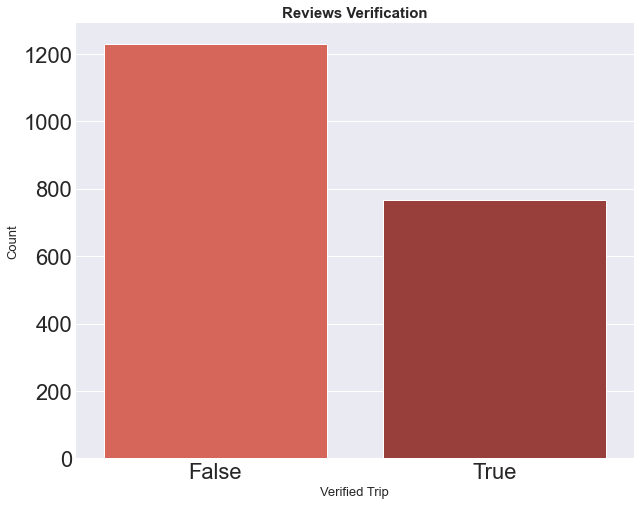

In [72]:
# Verified reviews and reviews which are not Verified
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
plt.style.use('seaborn-darkgrid')
sns.countplot(x='Trip Verified',data=data ,palette='Reds_d')
plt.title('Reviews Verification', fontsize=15,weight='bold')
plt.xlabel('Verified Trip', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

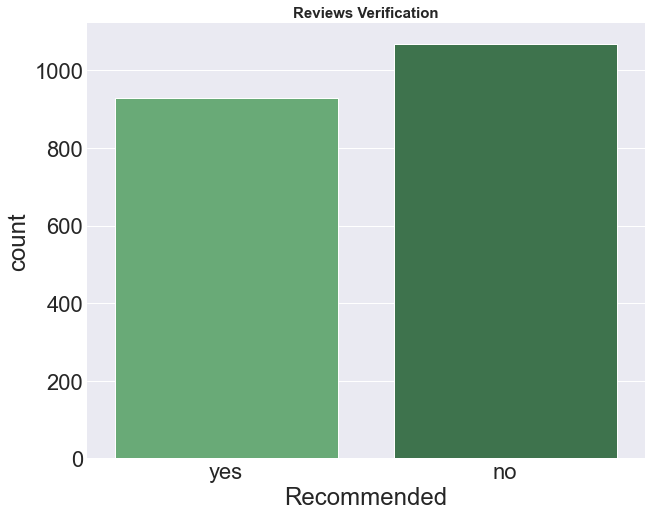

In [73]:
# # Visualaization of "Recommended" data
plt.figure(figsize=(10,8))
sns.countplot(x='Recommended',data=data,palette='Greens_d')
plt.title('Reviews Verification', fontsize=15,weight='bold')
plt.show()

# Top 10 Busy Routes

In [74]:
data['Route'].value_counts().index[0:10]

Index(['London to Johannesburg', 'Vancouver to London', 'Cape Town to London',
       'London to Cape Town', 'LHR to MIA', 'Johannesburg to London',
       'London to Vancouver', 'LHR to SFO', 'London to Athens', 'BKK to LHR'],
      dtype='object')

In [75]:
data['Route'].value_counts().values[0:10]

array([16, 14, 12, 11, 11, 10,  9,  9,  9,  9], dtype=int64)

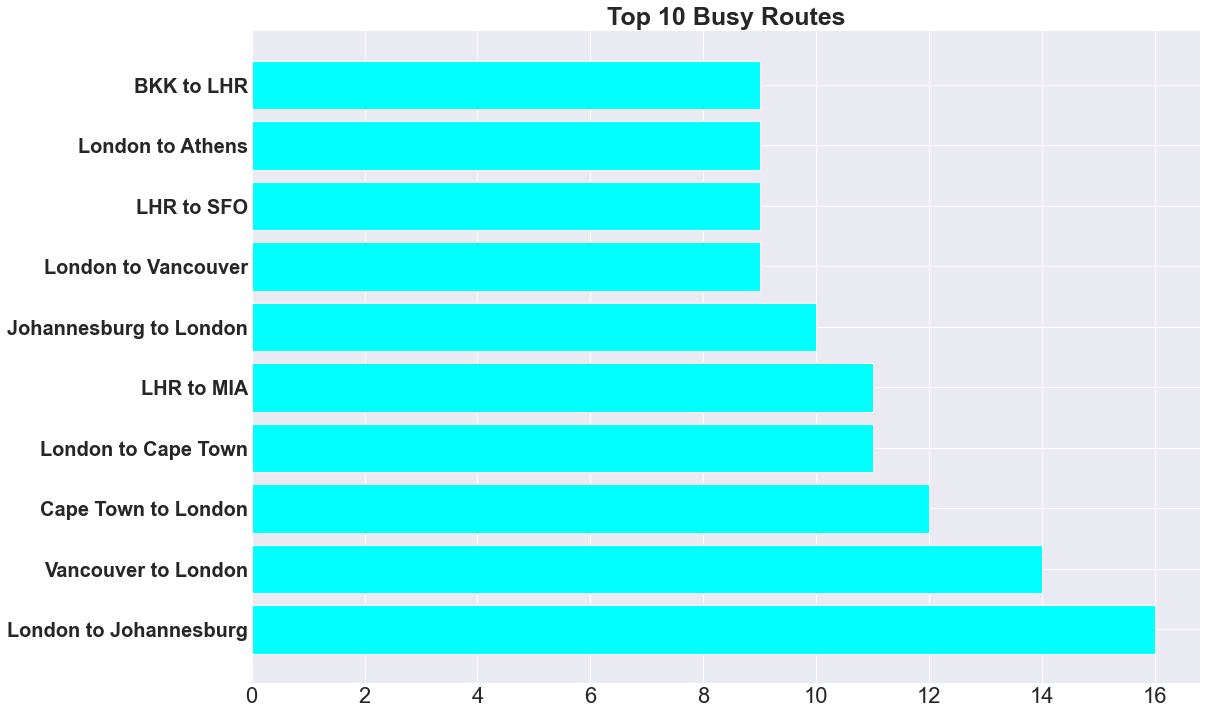

In [76]:
plt.figure(figsize=(17,12))
plt.barh(data['Route'].value_counts().index[0:10],data['Route'].value_counts().values[0:10], label='Route',color='aqua')
plt.title('Top 10 Busy Routes',fontsize=25,weight='bold')
plt.yticks(fontsize=20,weight='bold')
plt.show()

# Top 10 Aircrafts

In [184]:
data['Aircraft'].value_counts()

A320                   387
Boeing 777             283
Boeing 747-400         180
A380                   175
Boeing 777-200         128
                      ... 
Boeing 787-9, A380       1
A320 / Boeing 787-9      1
Airbus A32               1
A319 / Boeing 787-9      1
777-300                  1
Name: Aircraft, Length: 208, dtype: int64

In [190]:
data['Route'].value_counts()

London to Johannesburg             16
Vancouver to London                14
Cape Town to London                12
London to Cape Town                11
LHR to MIA                         11
                                   ..
London Heathrow to Mahon            1
Munich to London                    1
London to Reykjavik                 1
Washington to Prague via London     1
GLA-LHR                             1
Name: Route, Length: 1132, dtype: int64

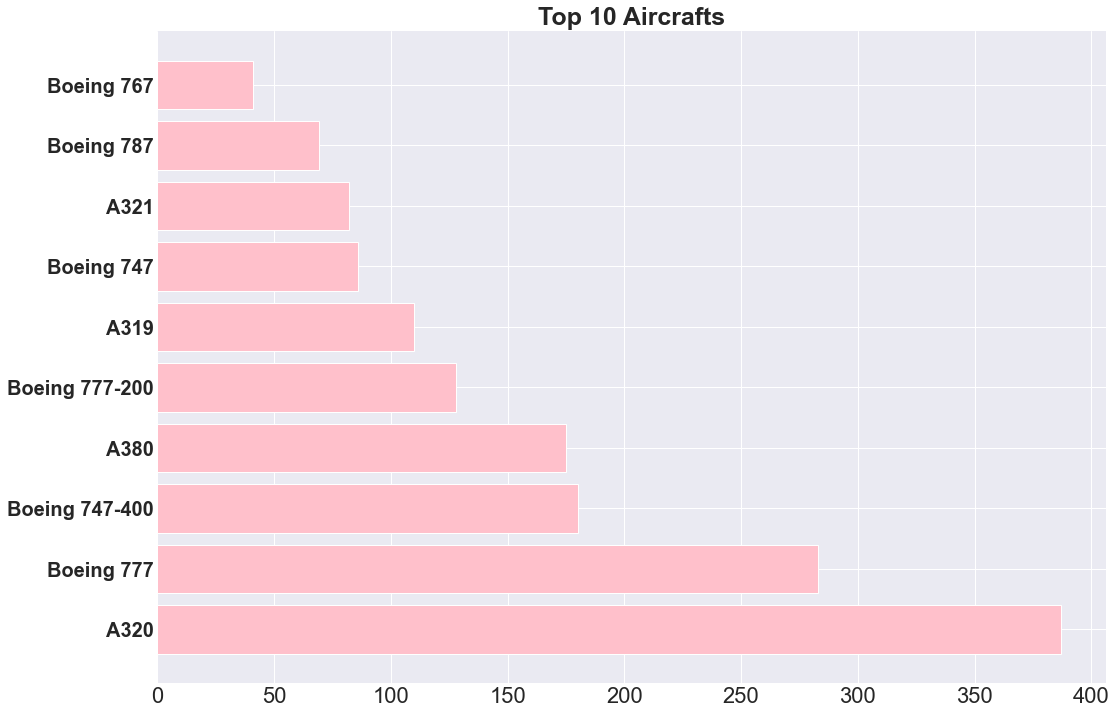

In [78]:
plt.figure(figsize=(17,12))
plt.barh(data['Aircraft'].value_counts().index[0:10],data['Aircraft'].value_counts().values[0:10], label='Aircraft',color='pink')
plt.title('Top 10 Aircrafts',fontsize=25,weight='bold')
plt.yticks(fontsize=20,weight='bold')
plt.show()

# Types Of Traveller

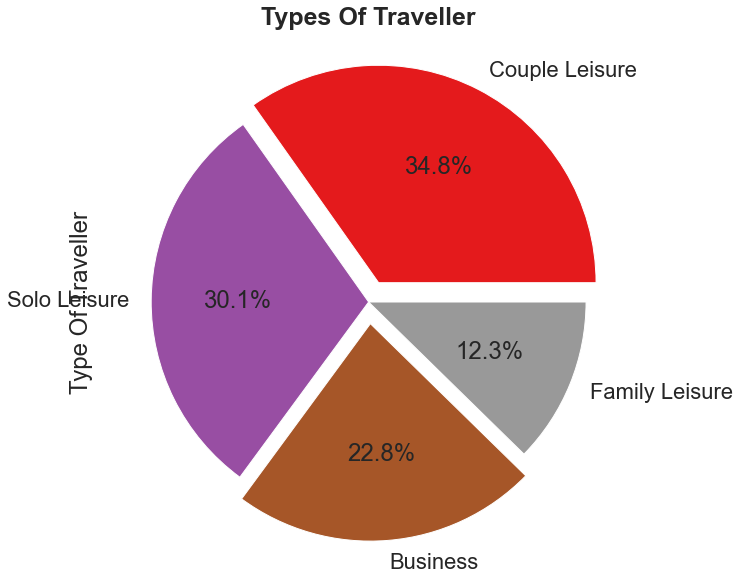

In [79]:
data['Type Of Traveller'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0.1, 0,0.1,0],cmap='Set1',figsize=(10,10))
plt.title('Types Of Traveller', fontsize=25,weight='bold')
#plt.legend(loc='upper left')
#plt.xticks(fontsize=15,weight='bold',rotation=45)
plt.savefig('TypesOfTraveller.png')
plt.show()

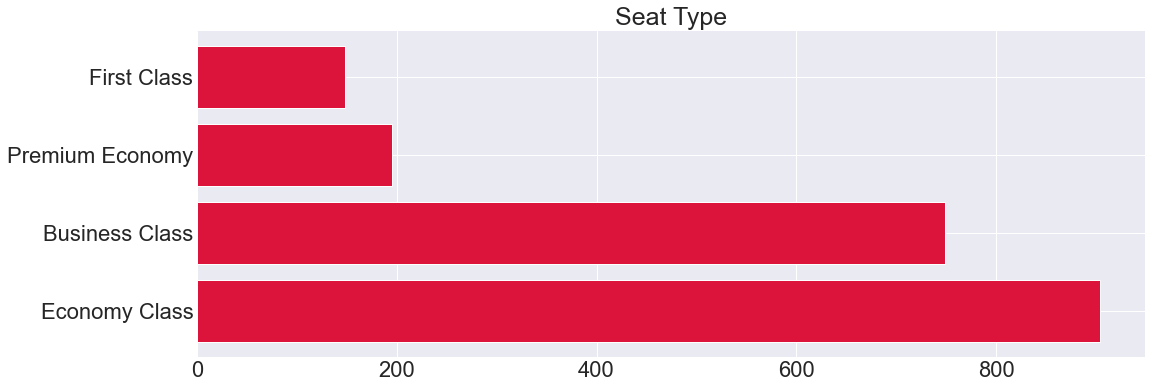

In [194]:
# Seat Type
plt.figure(figsize=(17,6))
index3 = data['Seat Type'].value_counts().index
values3 = data['Seat Type'].value_counts().values
plt.barh(index3, values3, label='Seat Type', color='crimson')
plt.title('Seat Type', fontsize=25)
plt.show()

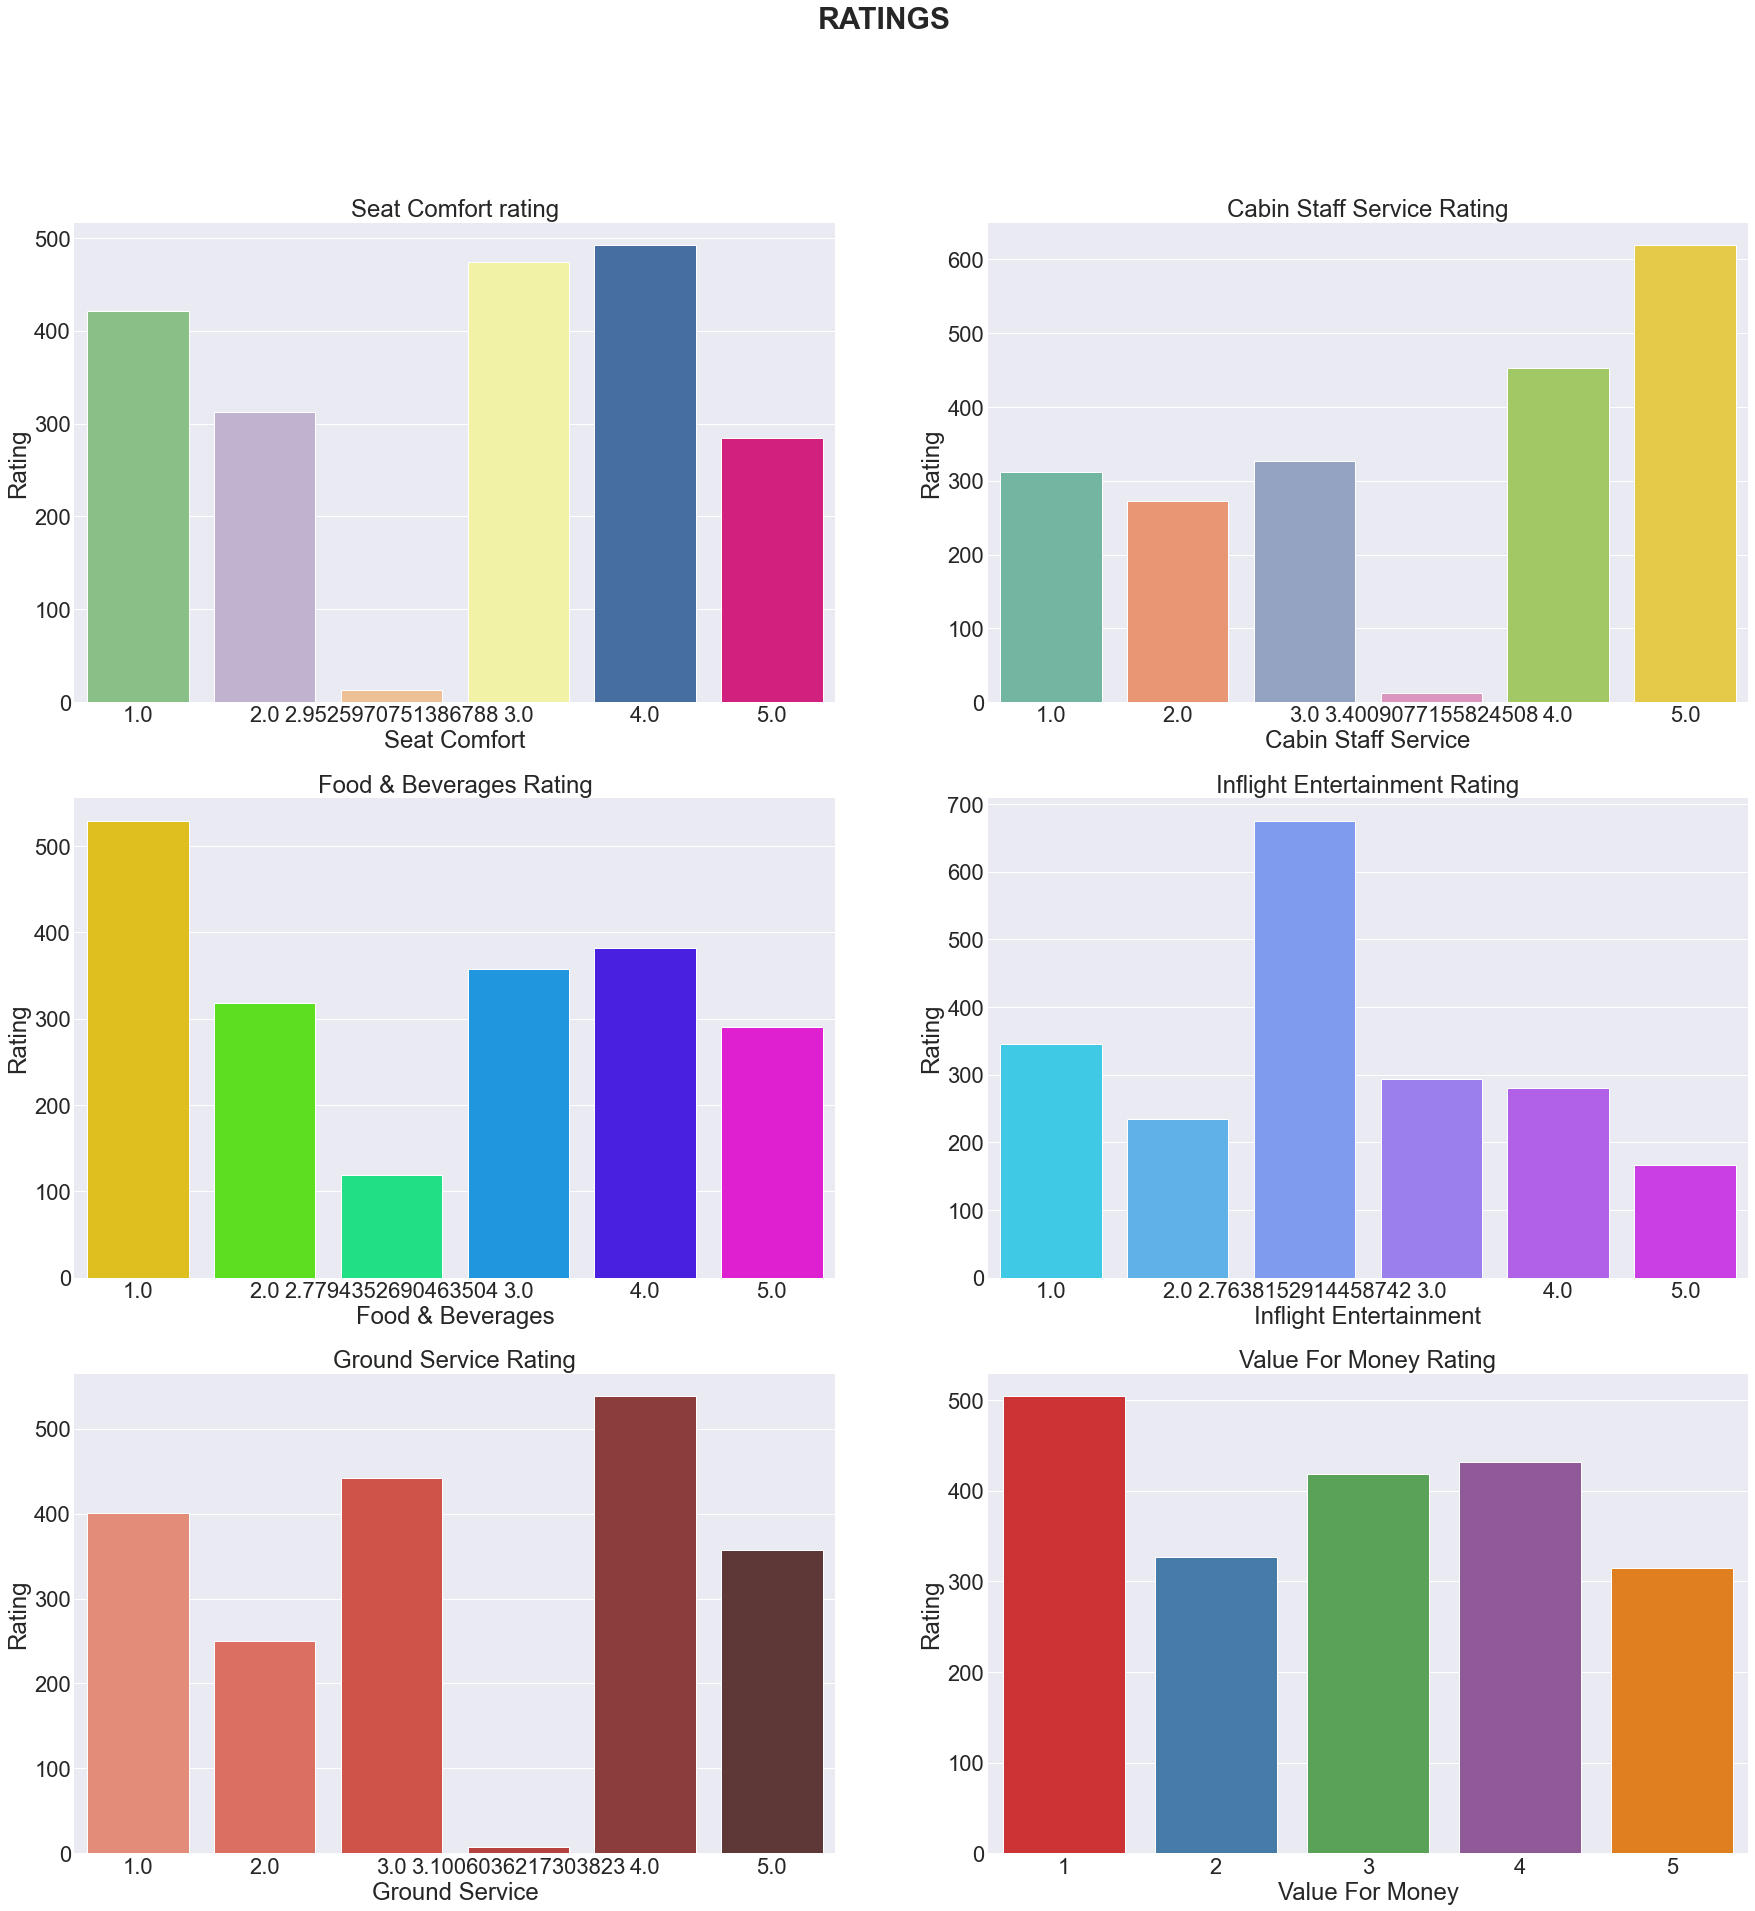

In [80]:
plt.figure(figsize=(30,30))

# seat comfort rating
plt.subplot(3,2,1)
sns.countplot(x='Seat Comfort',data=data , palette='Accent')
plt.ylabel('Rating')
plt.title('Seat Comfort rating')

# cabin staff service rating
plt.subplot(3,2,2)
sns.countplot(x='Cabin Staff Service',data=data , palette='Set2')
plt.ylabel('Rating')
plt.title('Cabin Staff Service Rating')

# Food & Beverages rating
plt.subplot(3,2,3)
sns.countplot(x='Food & Beverages',data=data , palette='hsv')
plt.ylabel('Rating')
plt.title('Food & Beverages Rating')

# Inflight Entertainment rating
plt.subplot(3,2,4)
sns.countplot(x='Inflight Entertainment',data=data , palette='cool')
plt.ylabel('Rating')
plt.title('Inflight Entertainment Rating')

# Ground service rating
plt.subplot(3,2,5)
sns.countplot(x='Ground Service',data=data , palette='Reds_d')
plt.ylabel('Rating')
plt.title('Ground Service Rating')

# Value for money rating
plt.subplot(3,2,6)
sns.countplot(x='Value For Money',data=data , palette='Set1')
plt.ylabel('Rating')
plt.title('Value For Money Rating')
plt.suptitle('RATINGS',fontsize=30,weight='bold')
plt.savefig('RATINGS.png')
plt.show()

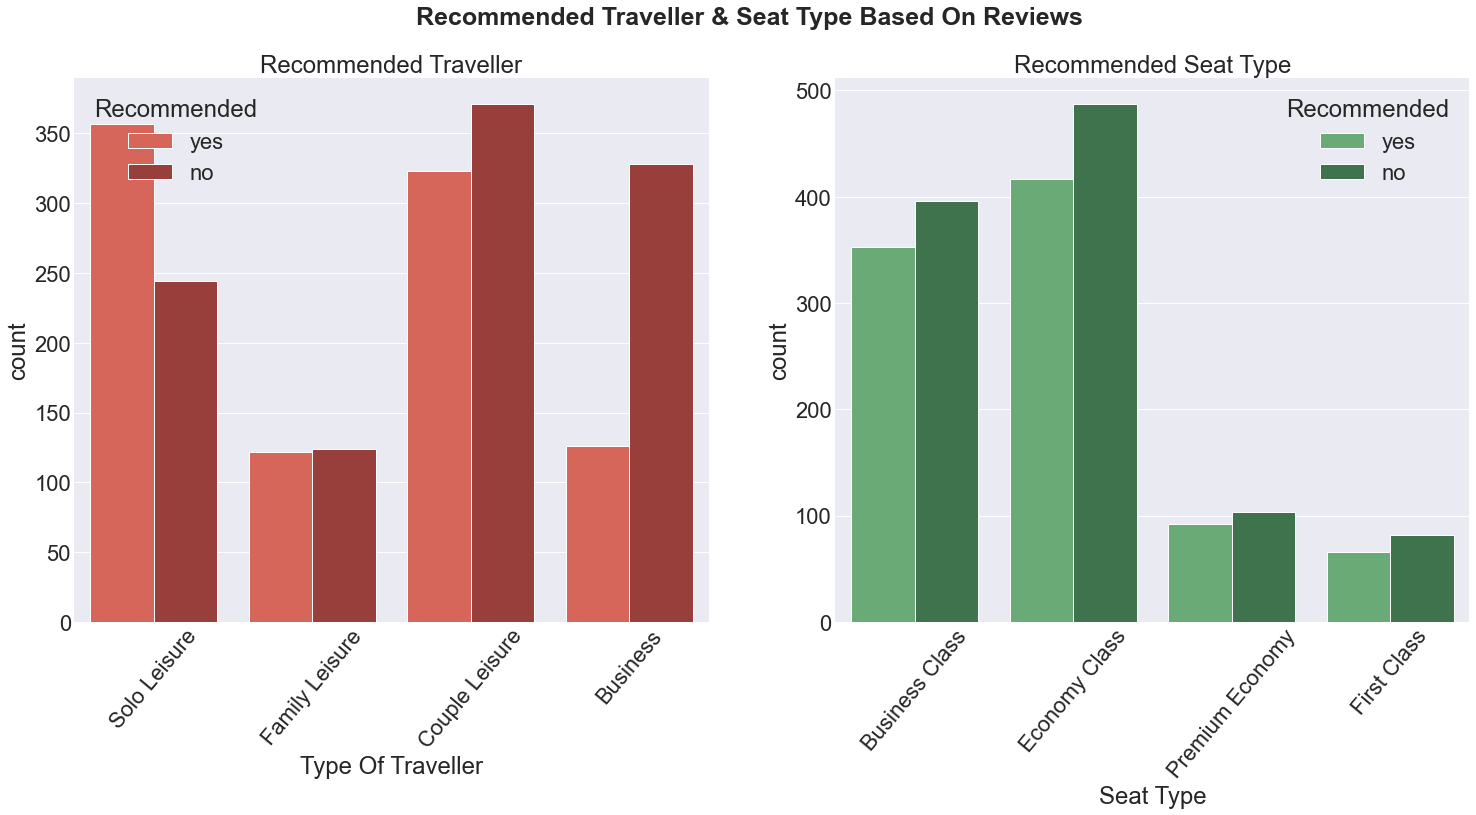

In [81]:
plt.figure(figsize=(25,10))

# Types of Traveller Recommend 
plt.subplot(1,2,1)
sns.countplot(x='Type Of Traveller',data=data, hue='Recommended', palette='Reds_d')
plt.xticks(rotation=50)
plt.title('Recommended Traveller')


# Seat Type Recommend
plt.subplot(1,2,2)
sns.countplot(x='Seat Type',data=data , hue='Recommended', palette='Greens_d')
plt.xticks(rotation=50)
plt.title('Recommended Seat Type')
plt.suptitle('Recommended Traveller & Seat Type Based On Reviews',fontsize=25,weight='bold')
plt.savefig('RATINGSbyTraveller&SeatType.png')
plt.show()

In [191]:
# Getting the mean rating  for every rating data
seat_comfort = data['Seat Comfort'].mean()
cabin_staff = data['Cabin Staff Service'].mean()
food_beverages = data['Food & Beverages'].mean()
inflight_entertainment = data['Inflight Entertainment'].mean()
ground_service = data['Ground Service'].mean()
value_For_money = data['Value For Money'].mean()
Ratings= [seat_comfort,cabin_staff,food_beverages,inflight_entertainment,ground_service,value_For_money]
Ratings=pd.DataFrame(Ratings,index=['Seat Comfort','Cabin Staff Service','Food & Beverages','Inflight Entertainment',
                                    'Ground Service','Value For Money'],columns=['ratings'])
rating=round(Ratings,2)
rating

,ratings
Seat Comfort,2.95
Cabin Staff Service,3.40
Food & Beverages,2.78
Inflight Entertainment,2.76
Ground Service,3.10
Value For Money,2.86


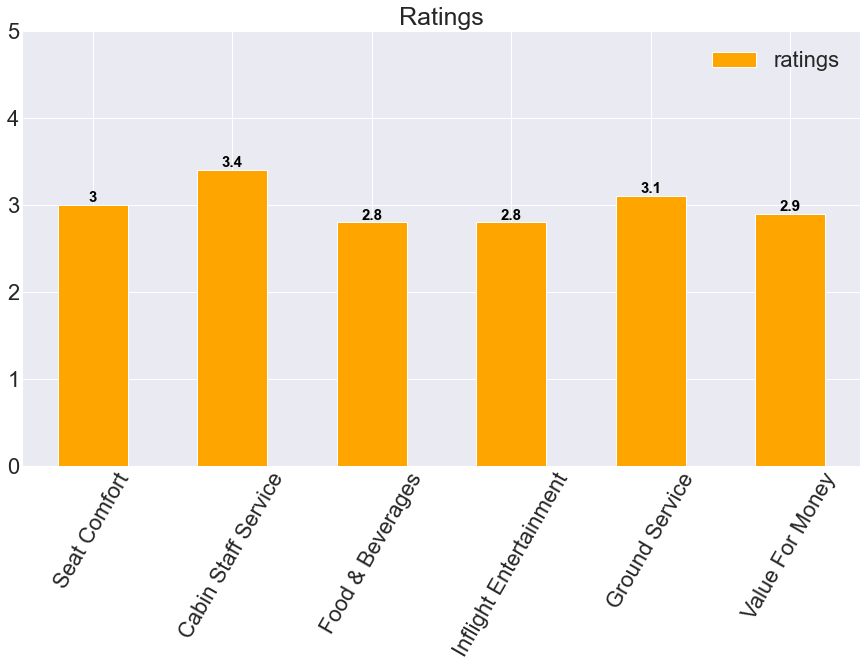

In [118]:
# Overall Ratings 
ax= rating.plot(kind='bar',color='orange',figsize=(15,8))
plt.ylim(0,5)
plt.xticks(rotation=60)
plt.title('Ratings', fontsize=25)
# Annotate each bar with its rating value
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=15, color='black',weight='bold')
    
plt.savefig('OVERALL RATINGS.png')
plt.show()

# Insights From Data Visualaization

Around 55% of customer are not recommending the service. therefor we need to improve that number

**Area's that need to be improved based on reviews rating**

* Seat Comfort
* Food and Beverages
* Inflight Entertainmen
* Traveller (Business & Couple Leisure)
* Seat Type (Economy class & Business class)

In [37]:
data.head(2)

,Unnamed: 0,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Aircraft,Food & Beverages,Inflight Entertainment,reviews,Trip Verified
1,1,Solo Leisure,Business Class,Vancouver to London,2024-07,5.0,5.0,4.0,4,yes,A350,5.0,5.000000,Trip Verified British Airways at its best Out...,True
2,2,Solo Leisure,Economy Class,London to Amman,2024-08,3.0,5.0,4.0,4,yes,A320,4.0,2.763815,An excellent flight Despite this being a hour ...,True


# Word Frequency Analysis

In [127]:
import re      # Regular expressions
import nltk    # Natural Language ToolKit Library
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaneela\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [122]:
# join the corpus
good_reviews =  ' '.join(data[data['Value For Money']>=2.5]['reviews'])
# lower case the words 
good_reviews = good_reviews.lower()
# removing puncuation
good_reviews = re.sub('[^a-zA-Z0-9]',' ',good_reviews) 

In [151]:
#split the text of all reviews into a list of words
good_reviews.split(" ")[:20]

['',
 'trip',
 'verified',
 'british',
 'airways',
 'at',
 'its',
 'best',
 'outstanding',
 'service',
 'from',
 'the',
 'flight',
 'attendants',
 'dinner',
 'very',
 'good',
 'though',
 'breakfast',
 'could']

**There are many words that does not set the idea of whether the review is positive or negative. For example words like "trip", "british","airways","flight" etc. does not add conlcusive value hence we can include them in stopwords list.**

In [153]:
stopwords.update(['ba', 'flight', 'british', 'airway', 'airline', 'plane', 'passenger',
                 'london', 'heathrow', 'aircraft', 'verified'])


# join the corpus
bad_reviews =  ' '.join(data[data['Value For Money']<=2.5]['reviews'])
# lower case the words 
bad_reviews = bad_reviews.lower()
# removing puncuation
bad_reviews = re.sub('[^a-zA-Z0-9]',' ',bad_reviews)

In [155]:
bad_reviews.split(" ")[:5]

['after', 'paying', 'for', 'tickets', 'for']

# Calculate Word Frequency of Good Reviews

In [160]:
#  Word Frequency for good reviews
from sklearn.feature_extraction import text
#split the text of all reviews into a list of words
words = good_reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', 'passenger','u', 'london','airway','british','airline','British','London',\
                                           'heathrow','plane','lhr','review','The','BA','.','`','|','','I',"'",'t','s'])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_good_reviews = pd.Series(dict(nlp_words))

# Plot for Word Frequency of Good Reviews

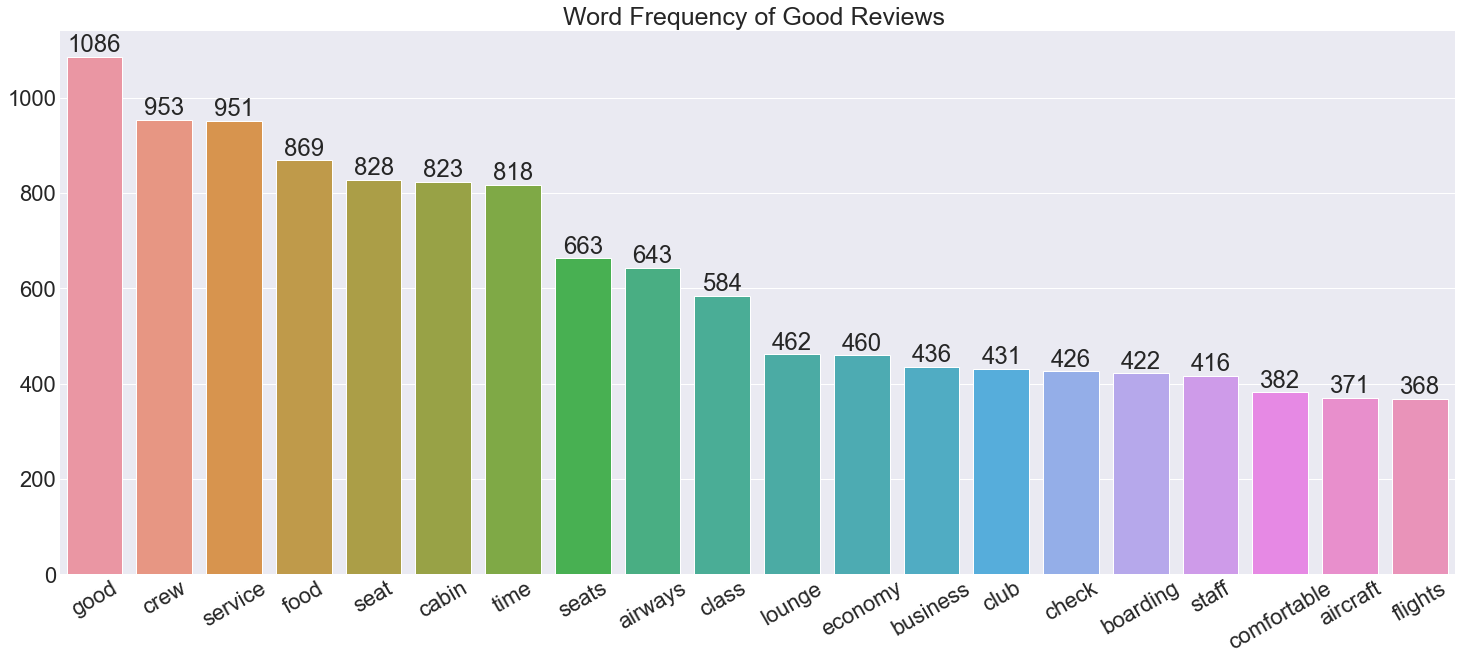

In [166]:
# Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(25,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_good_reviews.index, y=all_good_reviews.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.title('Word Frequency of Good Reviews ', fontsize=25)
plt.xticks(rotation=30)
plt.savefig('AllGoodReviews.png')

**This gives us a glimpse of what customers are really talking about here. We see that "Crew" is most talked about the airline followed by "service","food","Seat" and "Cabin" which are all very important to customers in terms of services.This bring significane that customer had Good experience in it.**

# Calculate Word Frequency of Bad Reviews

In [168]:
# Word Frequency for bad reviews


#split the text of all reviews into a list of words
words_bad = bad_reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', 'passenger','u', 'london','airway','british','airline','British','London',\
                                           'heathrow','plane','lhr','review','The','BA','.','`','|','','I',"'",'t','s'])


new_words_bad = [word for word in words_bad if word not in stopwords]

nlp_words=FreqDist(new_words_bad).most_common(20)

#create a dataframe of these word and its frequencies
all_bad_reviews = pd.Series(dict(nlp_words))

# Plot for Word Frequency of Bad Reviews

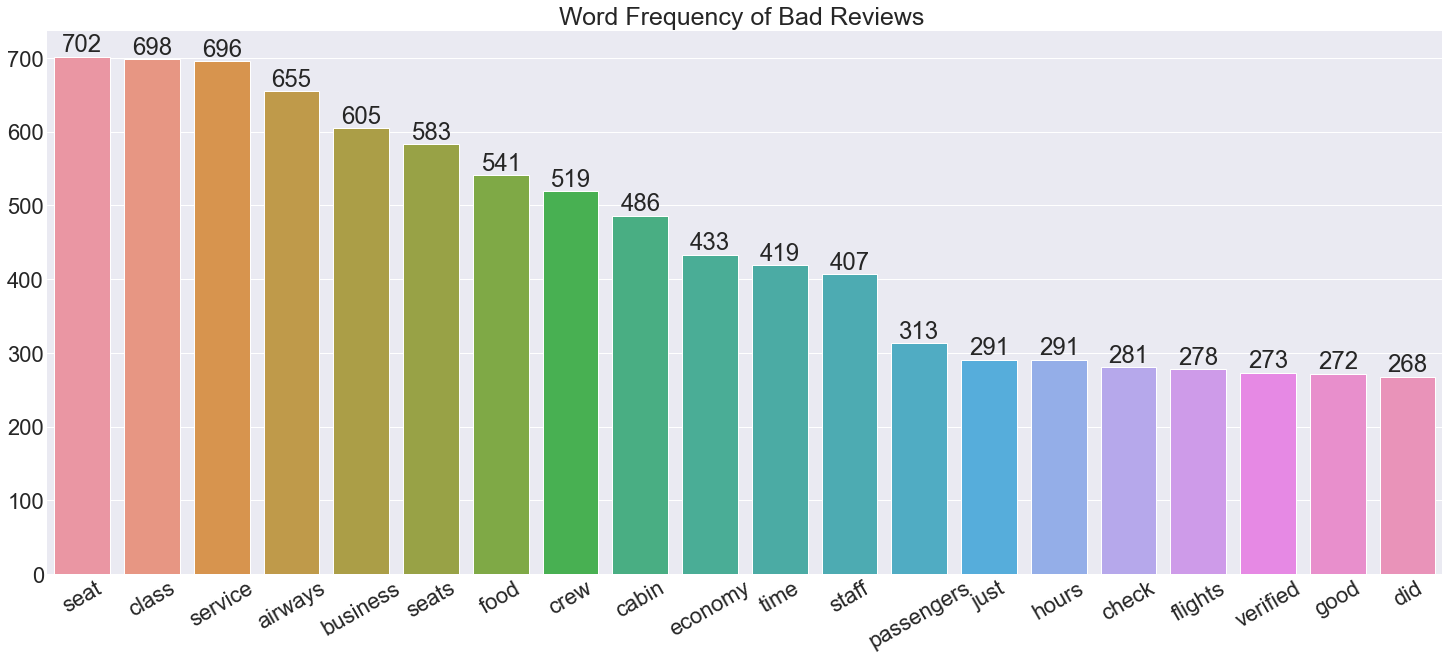

In [171]:
# Setting figure, ax into variables
fig, ax1 = plt.subplots(figsize=(25,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_bad_reviews.index, y=all_bad_reviews.values, ax=ax1)
all_plot.bar_label(all_plot.containers[0])
plt.title('Word Frequency of Bad Reviews ', fontsize=25)
plt.xticks(rotation=30)
plt.savefig('AllBadReviews.png')

**This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "class","Service" and "food" which are all very important to customers in terms of services.This bring significane that customer had bad experience in this.**

In [178]:
all_good_reviews

good           1086
crew            953
service         951
food            869
seat            828
cabin           823
time            818
seats           663
airways         643
class           584
lounge          462
economy         460
business        436
club            431
check           426
boarding        422
staff           416
comfortable     382
aircraft        371
flights         368
dtype: int64

In [181]:
all_bad_reviews

seat          702
class         698
service       696
airways       655
business      605
seats         583
food          541
crew          519
cabin         486
economy       433
time          419
staff         407
passengers    313
just          291
hours         291
check         281
flights       278
verified      273
good          272
did           268
dtype: int64

THANK YOU